# Read Data Sample

In [3]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",15)
%matplotlib inline

In [95]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "x"]

kdd_train = pd.read_csv("dataset/KDDTrain+.txt",names = col_names,)
kdd_train["label"] = kdd_train["label"].astype("category")

In [94]:
kdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,x
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125966,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
125967,0,tcp,http,SF,359,375,0,0,0,0,...,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,18


In [96]:
kdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,x
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [97]:
print("Column - Label")
print("Unique values: \n{}".format(kdd_train.label))
print("\nStatistical properties: \n{}".format(kdd_train.label.describe()))

Column - Label
Unique values: 
0          normal
1          normal
2         neptune
3          normal
4          normal
5         neptune
6         neptune
           ...   
125966    neptune
125967     normal
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: label, dtype: category
Categories (23, object): [back, buffer_overflow, ftp_write, guess_passwd, ..., spy, teardrop, warezclient, warezmaster]

Statistical properties: 
count     125973
unique        23
top       normal
freq       67343
Name: label, dtype: object


In [57]:
attack_types = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

is_attack = {
    "DoS":"Attack",
    "R2L":"Attack",
    "U2R":"Attack",
    "Probe":"Attack",
    "normal":"Normal"
}

In [98]:
kdd_train["attack_type"] = kdd_train.label.map(lambda x: attack_types[x])
kdd_train["is_attack"] = kdd_train.attack_type.map(lambda x: is_attack[x])

In [99]:
kdd_attack_type_group = kdd_train.groupby("attack_type")
kdd_is_attack_group = kdd_train.groupby("is_attack")


In [100]:
kdd_attack_type_group.is_attack.count()

attack_type
DoS       45927
Probe     11656
R2L         995
U2R          52
normal    67343
Name: is_attack, dtype: int64

In [101]:
kdd_is_attack_group.attack_type.count()

is_attack
Attack    58630
Normal    67343
Name: attack_type, dtype: int64

is_attack
Attack    [[Axes(0.125,0.794205;0.103333x0.0857955), Axe...
Normal    [[Axes(0.125,0.794205;0.103333x0.0857955), Axe...
dtype: object

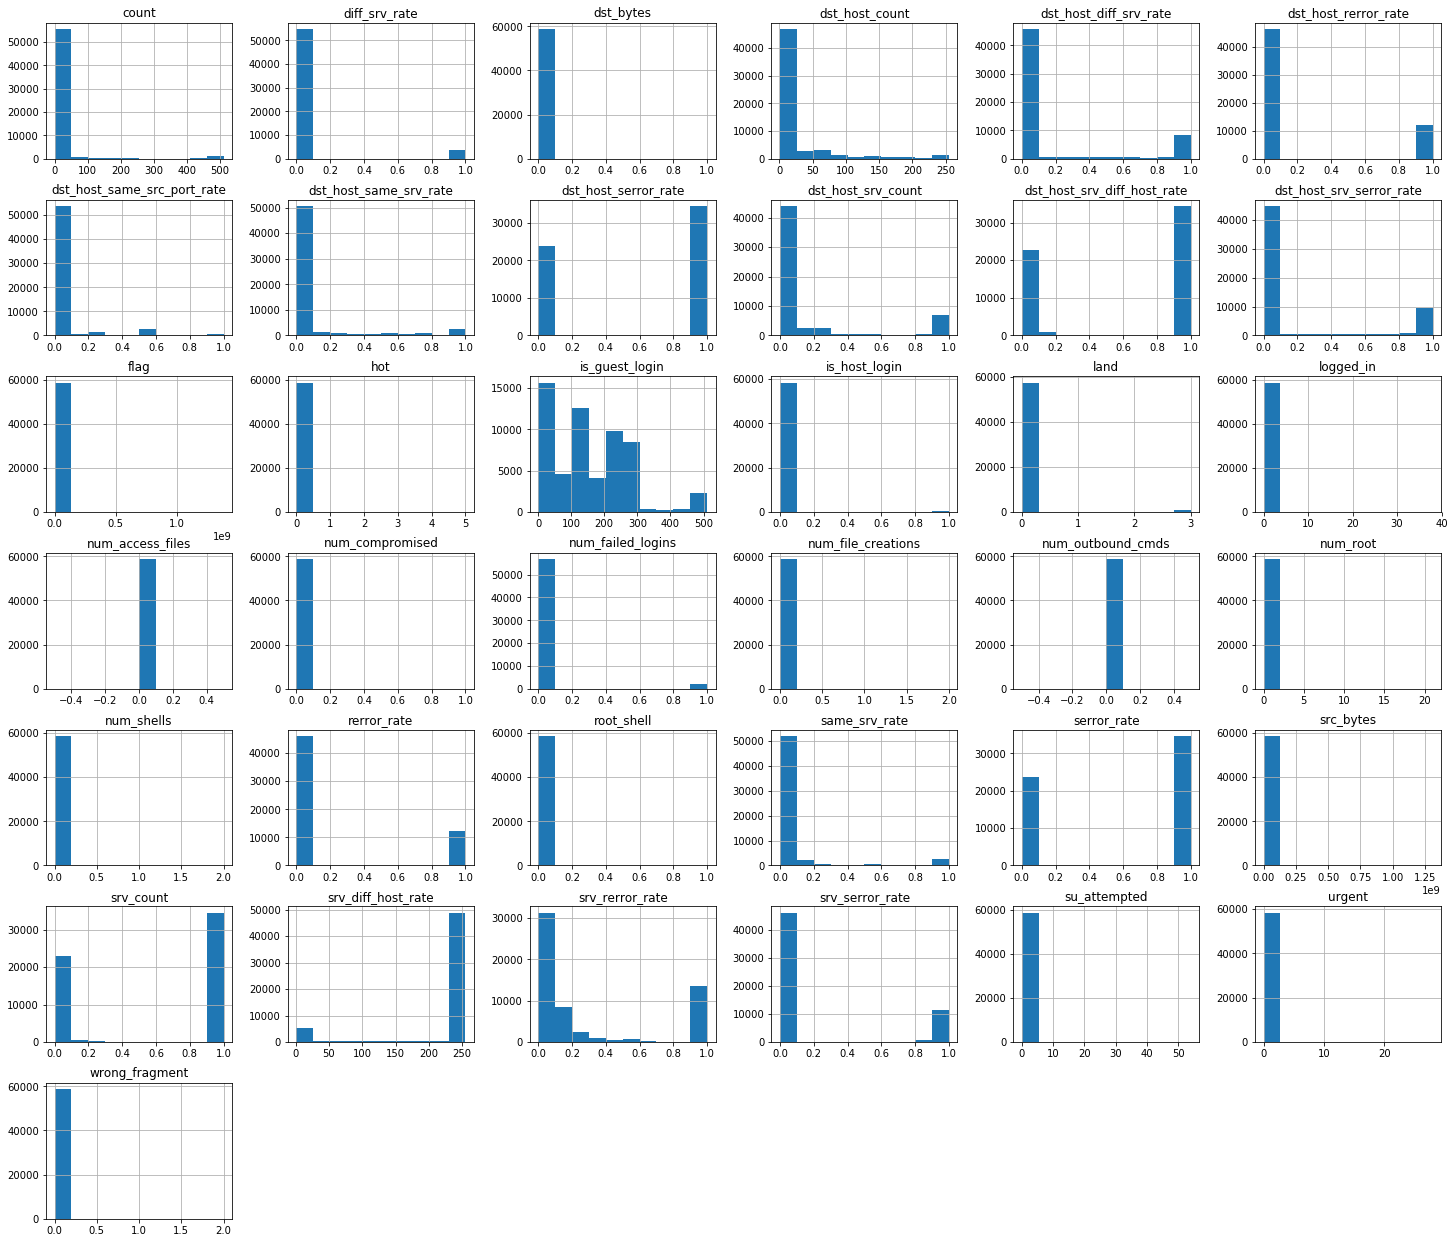

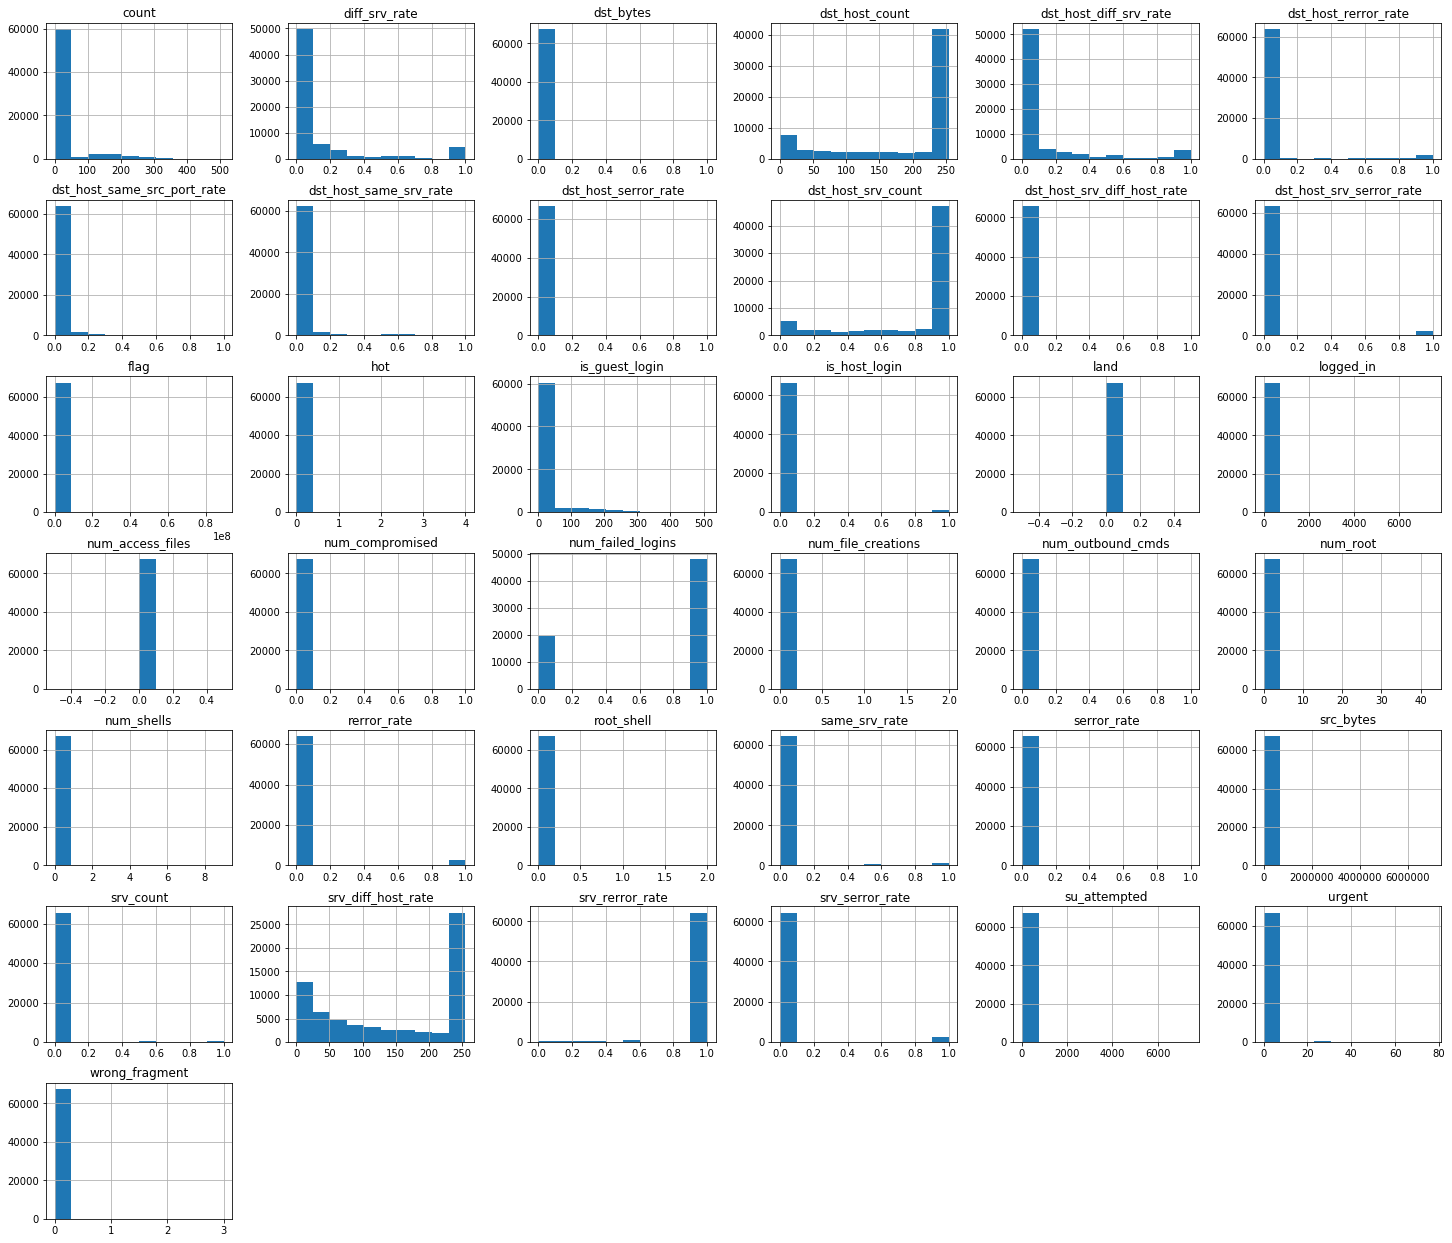

In [85]:
kdd_is_attack_group.hist(figsize=[25,22])

attack_type
DoS       [[Axes(0.125,0.794205;0.103333x0.0857955), Axe...
Probe     [[Axes(0.125,0.794205;0.103333x0.0857955), Axe...
R2L       [[Axes(0.125,0.794205;0.103333x0.0857955), Axe...
U2R       [[Axes(0.125,0.794205;0.103333x0.0857955), Axe...
normal    [[Axes(0.125,0.794205;0.103333x0.0857955), Axe...
dtype: object

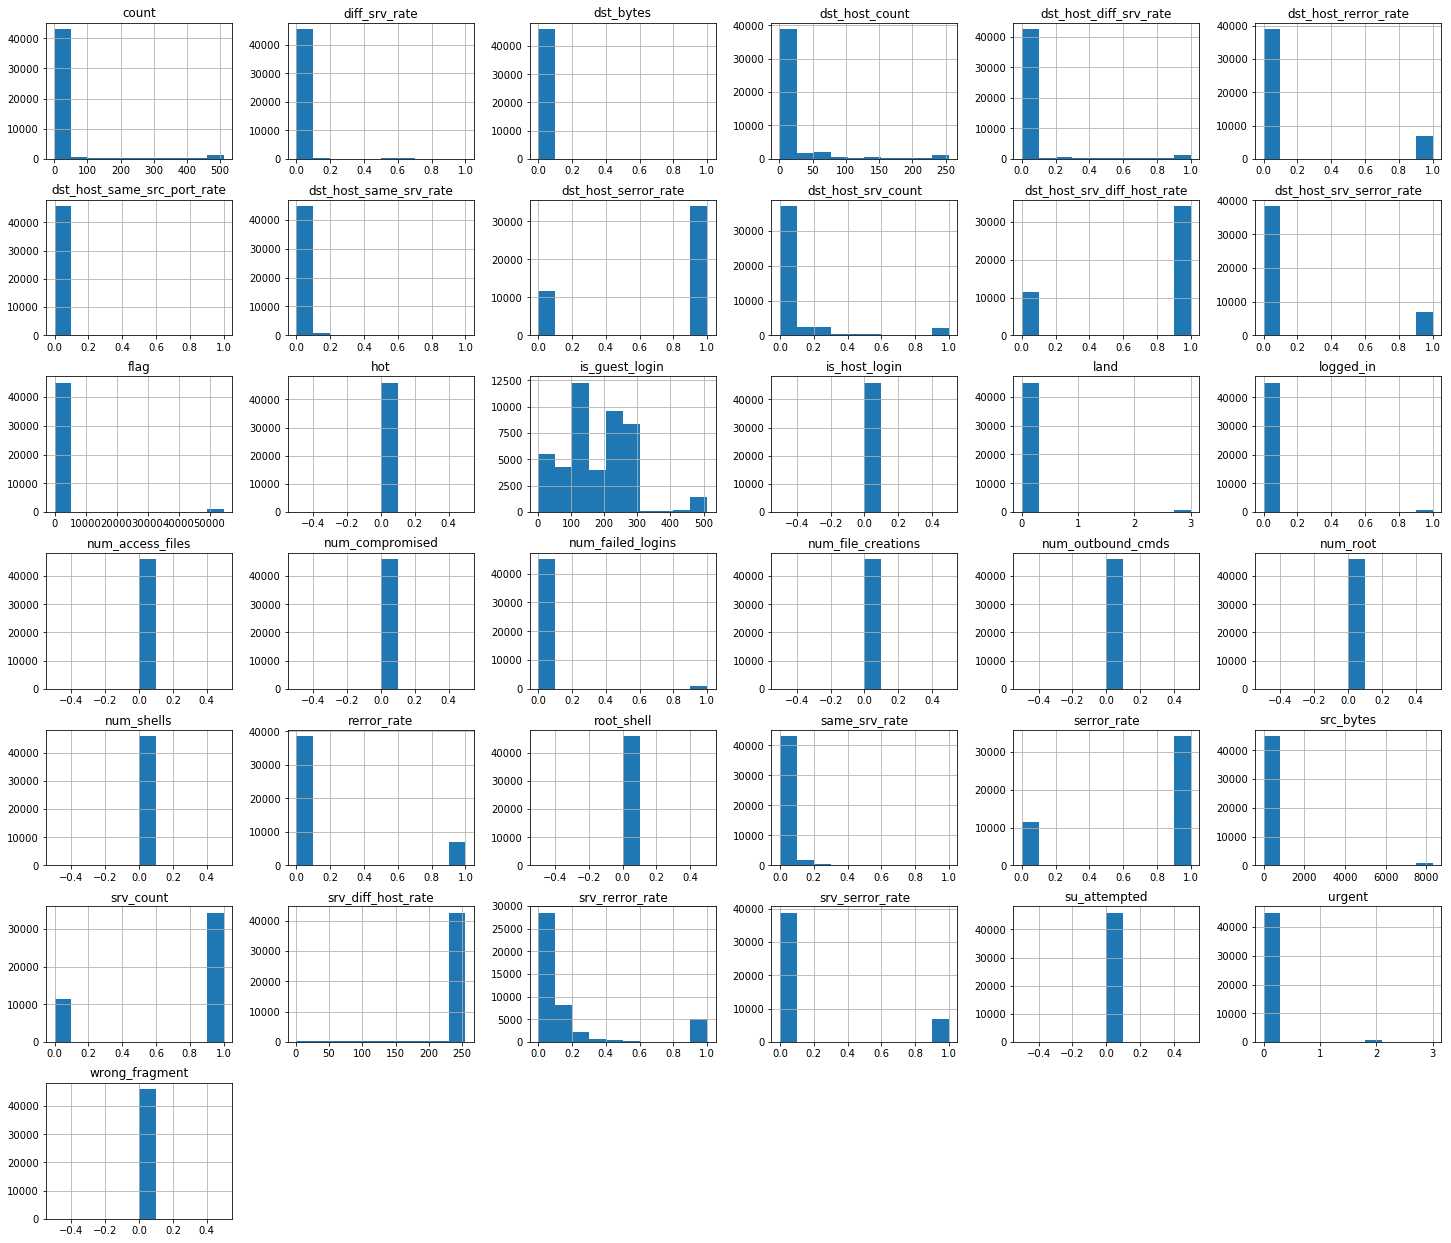

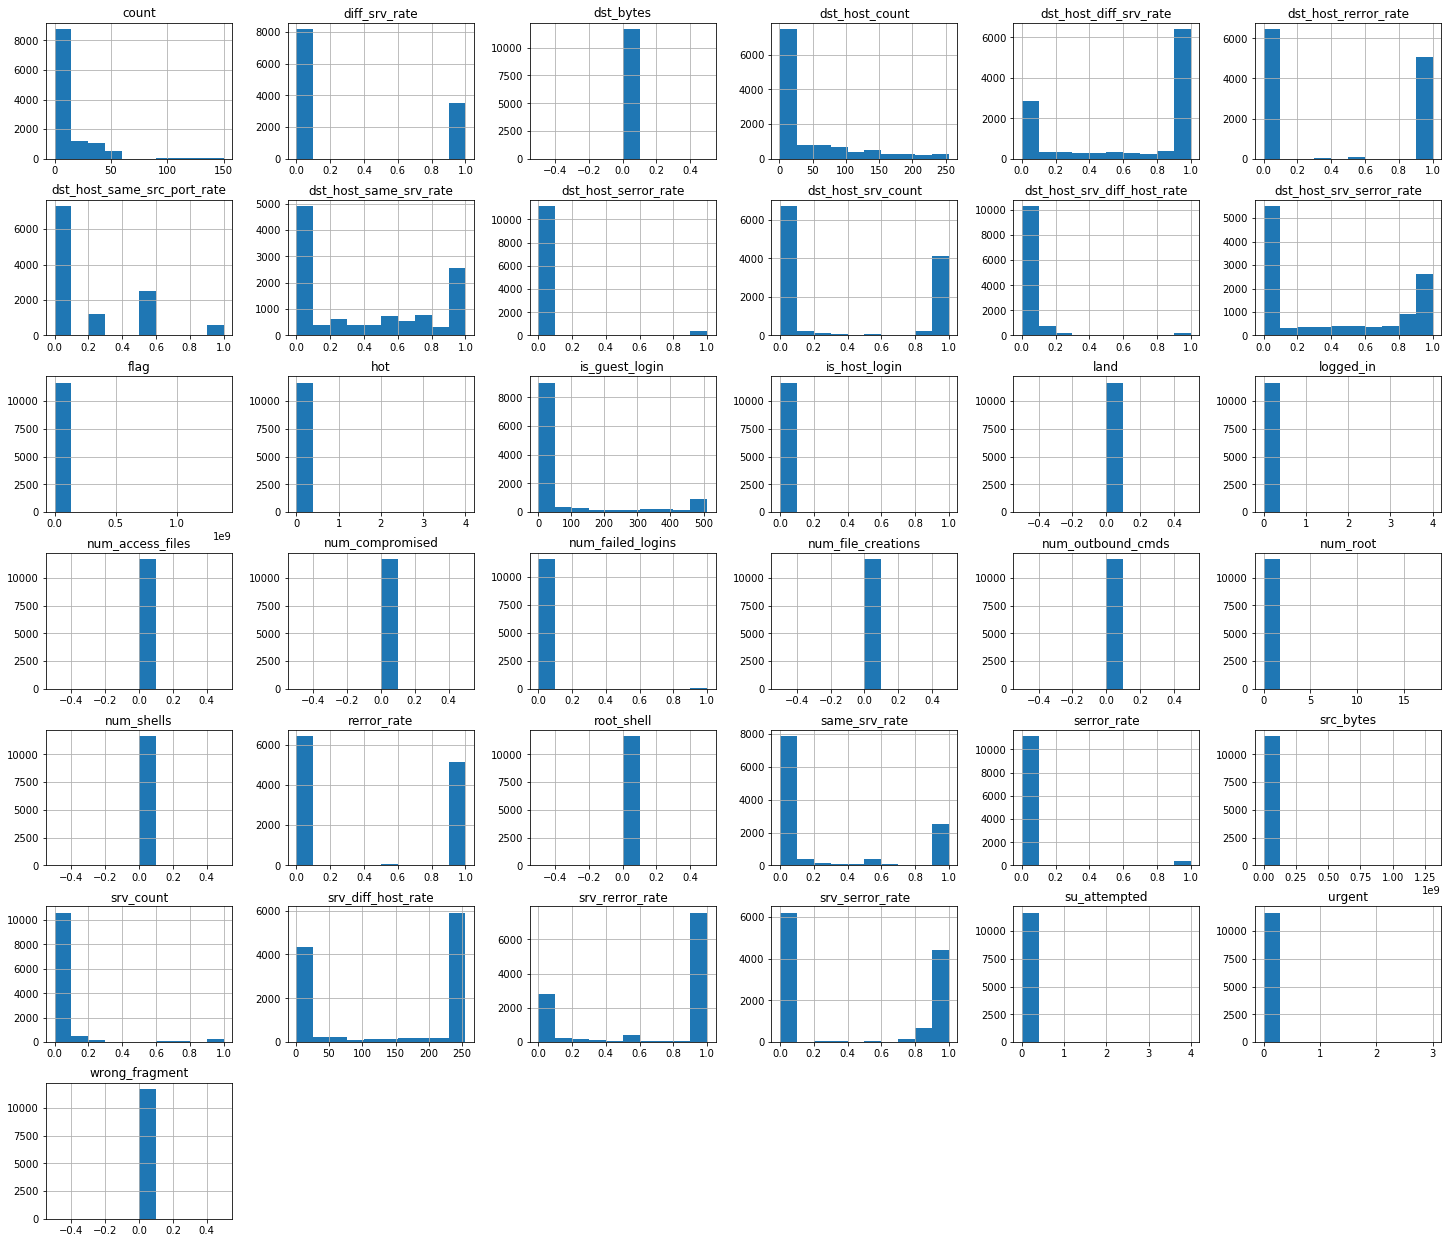

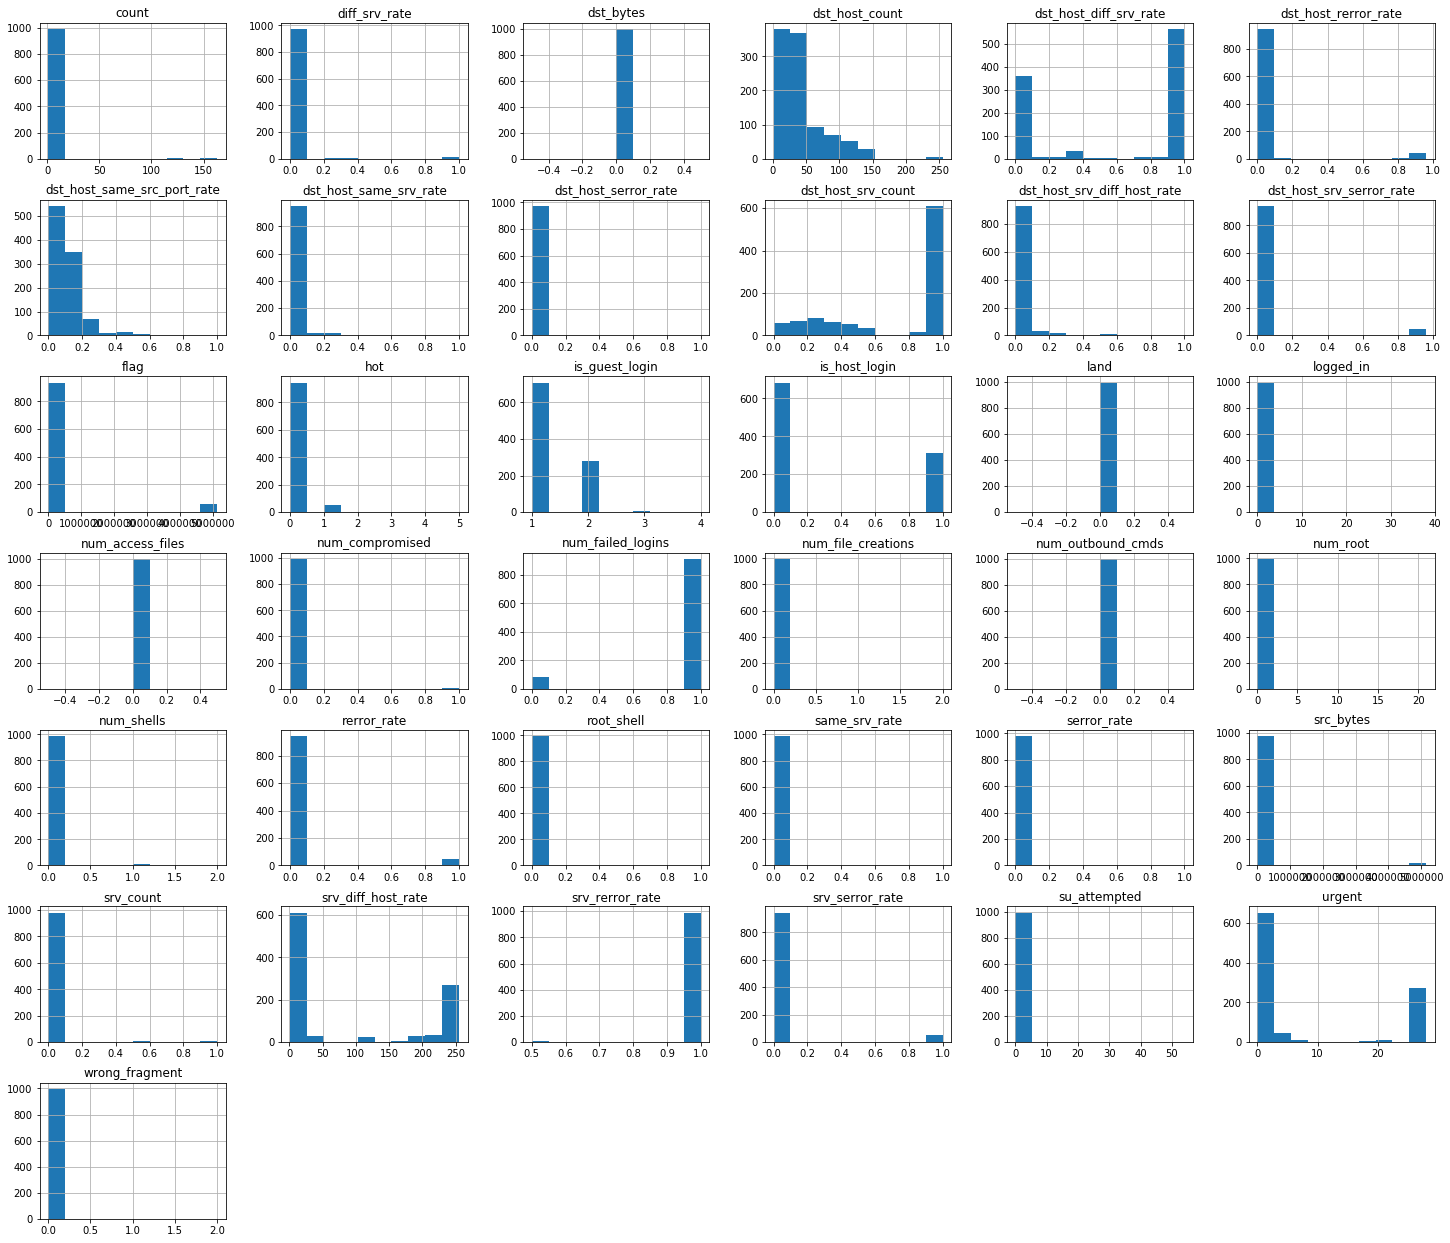

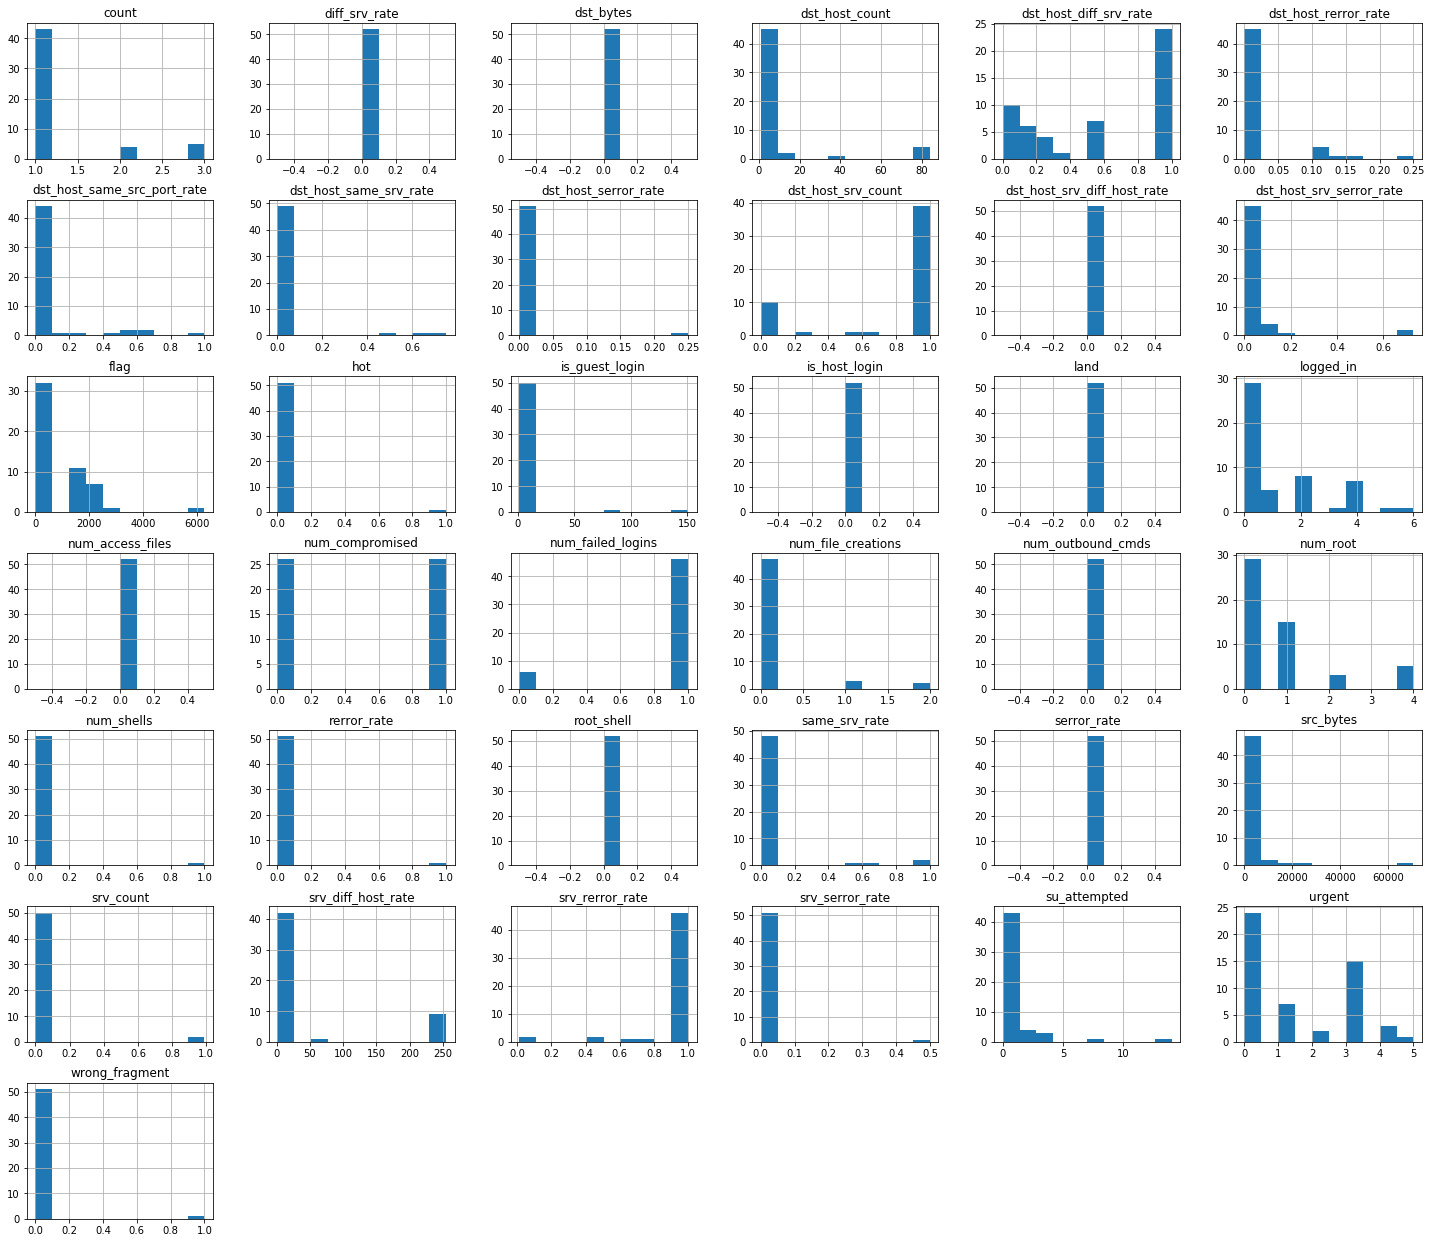

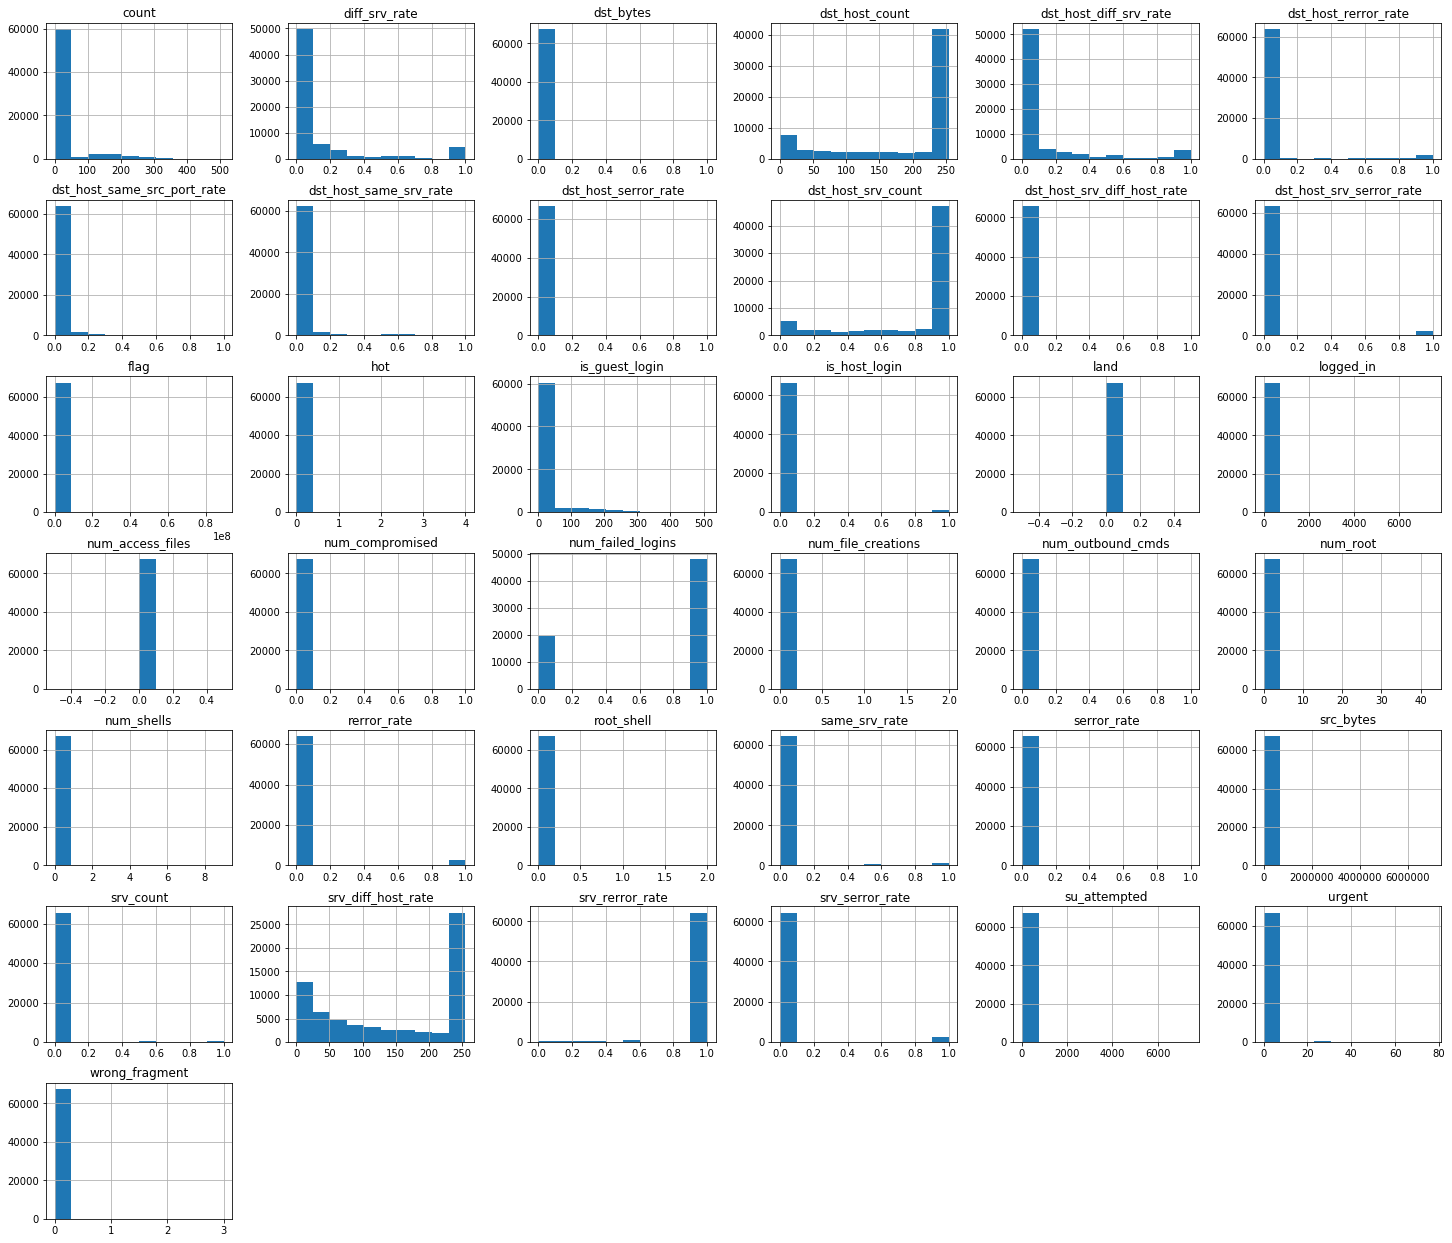

In [84]:
kdd_attack_type_group.hist(figsize=[25,22])

In [110]:
kdd_train.pivot_table(values=["protocol_type","service", "flag"], columns=["attack_type", "is_attack"], aggfunc="count")

               attack_type  is_attack
protocol_type  DoS          Attack       45927
               Probe        Attack       11656
               R2L          Attack         995
               U2R          Attack          52
               normal       Normal       67343
service        DoS          Attack       45927
               Probe        Attack       11656
               R2L          Attack         995
               U2R          Attack          52
               normal       Normal       67343
flag           DoS          Attack       45927
               Probe        Attack       11656
               R2L          Attack         995
               U2R          Attack          52
               normal       Normal       67343
dtype: int64